# Predicting the Winners of the 2024 Champions League Football Tournament with Machine Learning Models

The UEFA Champions League is one of the most prestigious and widely followed football tournaments in the world, where Europe's elite clubs compete for the coveted trophy. With the 2024 edition on the horizon, football enthusiasts and data analysts like ourselves are turning to machine learning to gain insights and make predictions about the potential winners. By leveraging historical data, team statistics, player performance metrics, and advanced algorithms, these models aim to unravel the intricate patterns and dynamics that influence the outcomes of matches. We thought it would be quite interesting to apply class knowledge to an area we are very passionar

## Data Collection

The first step to this exploration and analysis would be gathering relevant data. To build good models, we need the data from the football teams. We need a dataset that explicitly outlines the performance of the different teams, which can be extracted from previous Champions League games from over the years. We settled on this [UEFA Champion league statistics (1993-2020)](https://www.kaggle.com/datasets/bakar31/ucl-statistics/data) Kaggle dataset. We store this dataset in the same folder as our current notebook and import it using panda's `read_csv()` method.

In [54]:
import pandas as pd
data = pd.read_csv("ucl_stats.csv")
data

,year,team,match_played,wins,draws,losts,goals_scored,goals_conceded,gd,group_point,champions
0,1993,Marseille,6,3,3,0,14,4,10,9,1
1,1993,Milan,7,6,0,1,11,2,9,12,0
2,1993,Rangers,6,2,4,0,7,5,2,8,0
3,1993,Club Brugge,6,2,1,3,5,8,-3,5,0
4,1993,CSKA Moscow,6,0,2,4,2,11,-9,2,0
...,...,...,...,...,...,...,...,...,...,...,...
709,2020,Zenit Saint Petersburg,6,2,1,3,7,9,-2,7,0
710,2020,Valencia,8,3,2,3,13,15,-2,11,0
711,2020,Chelsea,8,3,2,3,12,16,-4,11,0
712,2020,Ajax,6,3,1,2,12,6,6,10,0


To get a general overview of the dataset, features it contains and descriptive numerical statistics, we apply the `info()` and `describe()` methods on our read dataset.

In [55]:
# View available columns and related info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            714 non-null    int64 
 1   team            714 non-null    object
 2   match_played    714 non-null    int64 
 3   wins            714 non-null    int64 
 4   draws           714 non-null    int64 
 5   losts           714 non-null    int64 
 6   goals_scored    714 non-null    int64 
 7   goals_conceded  714 non-null    int64 
 8   gd              714 non-null    int64 
 9   group_point     714 non-null    int64 
 10  champions       714 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 61.5+ KB


In [56]:
# Quick view of descriptive statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,714.0,2008.711485,7.340121,1993.0,2004.0,2009.0,2015.0,2020.0
match_played,714.0,7.673669,2.100880,6.0,6.0,6.0,8.0,13.0
wins,714.0,2.939776,2.316600,0.0,1.0,2.0,4.0,11.0
draws,714.0,1.844538,1.273169,0.0,1.0,2.0,3.0,7.0
losts,714.0,2.892157,1.234552,0.0,2.0,3.0,4.0,6.0
goals_scored,714.0,10.582633,6.979194,0.0,5.0,9.0,14.0,43.0
goals_conceded,714.0,10.443978,3.634080,2.0,8.0,10.0,13.0,24.0
gd,714.0,0.198880,7.573646,-22.0,-5.0,0.0,5.0,35.0
group_point,714.0,8.183473,4.192922,-8.0,5.0,8.0,11.0,18.0
champions,714.0,0.039216,0.194244,0.0,0.0,0.0,0.0,1.0


## Data Cleaning

Now that we have our dataset stored in the `data` variable and ready to go, the next logical step for data analysis is to clean the data. This step scans the data set and ensures there are no missing values or inconsistent values in our dataset. However, in our case our dataset seems to be quite clean as no missing values or inconsistencies are detected.

In [57]:
# Check for missing values
data.isna().sum()  

year              0
team              0
match_played      0
wins              0
draws             0
losts             0
goals_scored      0
goals_conceded    0
gd                0
group_point       0
champions         0
dtype: int64

In [58]:
# Check for duplicates
duplicates = data[data.duplicated()]
print("Number of duplicates: ", len(duplicates))

Number of duplicates:  0


In [59]:
# Function to handle any possible inconsistencies in our dataset
def fix_inconsistencies(data):
    # Ensure that matches played = wins + draws + losses
    data = data[data['wins'] + data['draws'] + data['losts'] == data['match_played']]
    
    # Check that Goal Diff = Goals For - Goals Against
    data = data[data['goals_scored'] - data['goals_conceded'] == data['gd']]
    
    return data

cleaned_df = fix_inconsistencies(data.copy()) # Using a copy of the original data set
cleaned_df

,year,team,match_played,wins,draws,losts,goals_scored,goals_conceded,gd,group_point,champions
0,1993,Marseille,6,3,3,0,14,4,10,9,1
1,1993,Milan,7,6,0,1,11,2,9,12,0
2,1993,Rangers,6,2,4,0,7,5,2,8,0
3,1993,Club Brugge,6,2,1,3,5,8,-3,5,0
4,1993,CSKA Moscow,6,0,2,4,2,11,-9,2,0
...,...,...,...,...,...,...,...,...,...,...,...
709,2020,Zenit Saint Petersburg,6,2,1,3,7,9,-2,7,0
710,2020,Valencia,8,3,2,3,13,15,-2,11,0
711,2020,Chelsea,8,3,2,3,12,16,-4,11,0
712,2020,Ajax,6,3,1,2,12,6,6,10,0


## Feature Engineering

At this stage, we rename some features to further clarify what they represent. Unneccessary features are dropped from the dataset here as well, in addition to encoding categorical variables. From the existing attributes, we also need to build new features in order to provide important metrics that might serve to improve our model's prerformance.

In [60]:
# Rename features
df = cleaned_df # Renamed for easier typing and more cleaner code
df = df.rename(columns={'match_played': 'matches_played', 'losts': 'losses', 'gd': 'goal_diff'})
df.head()

,year,team,matches_played,wins,draws,losses,goals_scored,goals_conceded,goal_diff,group_point,champions
0,1993,Marseille,6,3,3,0,14,4,10,9,1
1,1993,Milan,7,6,0,1,11,2,9,12,0
2,1993,Rangers,6,2,4,0,7,5,2,8,0
3,1993,Club Brugge,6,2,1,3,5,8,-3,5,0
4,1993,CSKA Moscow,6,0,2,4,2,11,-9,2,0


From the printed dataset, we can see that we now have more gramatically correct feature names, all written in full and multple words separated with underscores to provide clear insights into their meanings while still conforming with Python syntax rules.

Next, we drop the `year` feature as we deem it unimportant for the training and testing of our models. It adds very little to no value to the problem we are trying to tackle and the way we have chosen to tackle it.

In [61]:
# Drop unnecessary features
df.drop(['year'], axis = 1, inplace = True)
df

,team,matches_played,wins,draws,losses,goals_scored,goals_conceded,goal_diff,group_point,champions
0,Marseille,6,3,3,0,14,4,10,9,1
1,Milan,7,6,0,1,11,2,9,12,0
2,Rangers,6,2,4,0,7,5,2,8,0
3,Club Brugge,6,2,1,3,5,8,-3,5,0
4,CSKA Moscow,6,0,2,4,2,11,-9,2,0
...,...,...,...,...,...,...,...,...,...,...
709,Zenit Saint Petersburg,6,2,1,3,7,9,-2,7,0
710,Valencia,8,3,2,3,13,15,-2,11,0
711,Chelsea,8,3,2,3,12,16,-4,11,0
712,Ajax,6,3,1,2,12,6,6,10,0


We need to encode the categorical features that still exist in our dataset. This is a very important step as the inbuilt `scikit-learn` model builders/classifiers do not work too well with categorical data. This step is essential to prevent any related errors from arising during the training of our models. The only categorical data we have in our dataset now is the `team` feature. Hence, we go ahead and encode it using `pandas` built-in methods.

In [62]:
# Encode team column
df['team'] = df['team'].astype('category').cat.codes

**Building new features:** While the features we currently have provide meaningful insights into each team's performance, it might be beneficial to build more numerical feautures from these existing features. A few inherent relationships might exist between these present features that provide stronger insights to perfromance. Ratios and differences are often good ways of analyzing relationships between features, so we go ahead to construct a few ratios and differences from our current variables and add them to our dataset.

In [63]:
# Build new Ratio features
df['Win_Ratio'] = (df['wins']) / df['matches_played']
df['Loss_Ratio'] = (df['losses']) / df['matches_played']
df['GoalsScored_to_Matches'] = (df['goals_scored']) / df['matches_played']
df['GoalsConceeded_to_Matches'] = (df['goals_conceded']) / df['matches_played']
df['Win_to_Loss'] = (df['wins']) / (df['losses'] + 1)
df['Wins_to_GoalsScored'] = (df['wins']) / (df['goals_scored'] + 1) 
df['GoalsScored_GoalsConceded'] = (df['goals_scored'] - df['goals_conceded']) + 0.1
# df['GoalsScored_to_GoalDiff'] = df['goals_scored'] / (df['goal_diff'] + 1)
df

,team,matches_played,wins,draws,losses,goals_scored,goals_conceded,goal_diff,group_point,champions,Win_Ratio,Loss_Ratio,GoalsScored_to_Matches,GoalsConceeded_to_Matches,Win_to_Loss,Wins_to_GoalsScored,GoalsScored_GoalsConceded
0,87,6,3,3,0,14,4,10,9,1,0.500000,0.000000,2.333333,0.666667,3.00,0.200000,10.1
1,88,7,6,0,1,11,2,9,12,0,0.857143,0.142857,1.571429,0.285714,3.00,0.500000,9.1
2,106,6,2,4,0,7,5,2,8,0,0.333333,0.000000,1.166667,0.833333,2.00,0.250000,2.1
3,43,6,2,1,3,5,8,-3,5,0,0.333333,0.500000,0.833333,1.333333,0.50,0.333333,-2.9
4,38,6,0,2,4,2,11,-9,2,0,0.000000,0.666667,0.333333,1.833333,0.00,0.000000,-8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,140,6,2,1,3,7,9,-2,7,0,0.333333,0.500000,1.166667,1.500000,0.50,0.250000,-1.9
710,134,8,3,2,3,13,15,-2,11,0,0.375000,0.375000,1.625000,1.875000,0.75,0.214286,-1.9
711,42,8,3,2,3,12,16,-4,11,0,0.375000,0.375000,1.500000,2.000000,0.75,0.230769,-3.9
712,10,6,3,1,2,12,6,6,10,0,0.500000,0.333333,2.000000,1.000000,1.00,0.230769,6.1


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 685 entries, 0 to 713
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   team                       685 non-null    int16  
 1   matches_played             685 non-null    int64  
 2   wins                       685 non-null    int64  
 3   draws                      685 non-null    int64  
 4   losses                     685 non-null    int64  
 5   goals_scored               685 non-null    int64  
 6   goals_conceded             685 non-null    int64  
 7   goal_diff                  685 non-null    int64  
 8   group_point                685 non-null    int64  
 9   champions                  685 non-null    int64  
 10  Win_Ratio                  685 non-null    float64
 11  Loss_Ratio                 685 non-null    float64
 12  GoalsScored_to_Matches     685 non-null    float64
 13  GoalsConceeded_to_Matches  685 non-null    float64
 14 

### Feature Correlation

Now that we have all our intended features ready to go, we can analyze the correlations that exist among these features as well the the relationships between the individual features and the target variable. One great way to do this is using a correlation matrix. This provides a neat visual to explore these existing relationships. 

To use this, we make use of the Seaborn package's `heatmap` function. We can interpret the plot using the scale to the right. Here we see that lighter colors indicate a higher positive correlation where darker hues represent higher negative correlations. A red-purple color indicates little to no correlation. 

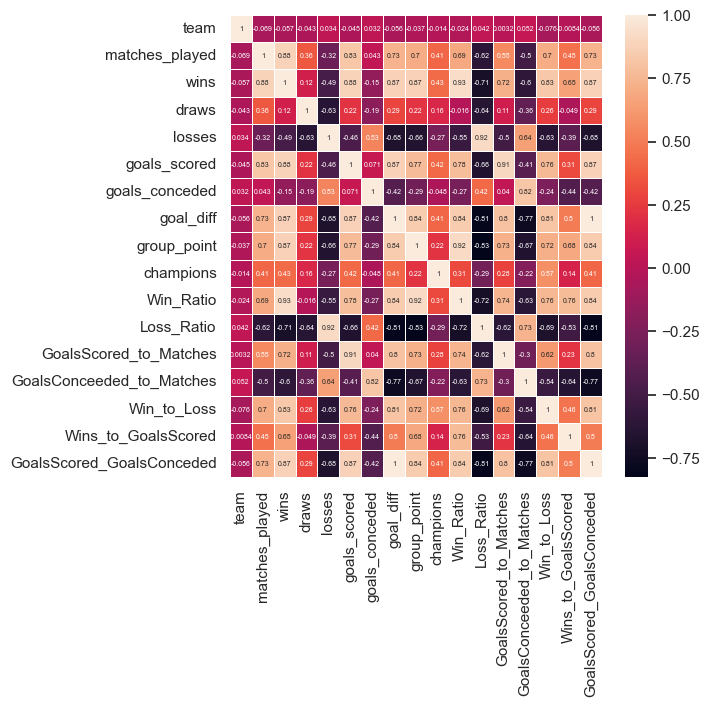

In [65]:
features = df.columns.tolist()
correlation = df[features].corr()

# Print the correlation matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(correlation, annot=True, annot_kws={"size": 5}, linewidths=0.5)
plt.show()

### Cross Validation: Train/Test Split

We decided to use the Test set cross validation method for training our model. This involves splitting our dataset into training and testing sets, training the model on the training setand evaluating its performance on the test set. We want to give the model as much data as possible to train with. However, we also want to make sure that we have enough data for the model to test itself on.

We split our data using the scikit-learn `train_test_split` function. In our case, since our dataset, we  is not very large, we chose 70% of the overall dataset for our training data and 30% for the test set to be somewhat fair to both training and testing. We set `stratify=y` to ensure that both the train and test sets have the same proportion of of the 0s and 1s in the target variable, `champions` as the original dataset.

In [242]:
RANDOM_SEED = 2024
X = df.drop("champions", axis=1)
y = df['champions'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = RANDOM_SEED, stratify=y)

### Scaling/Standardizing Features

Before modeling, we need to standardie our data by scaling. We scale to control for the fact that different variables are measured on different scales. This is especially important to do before performing Principal Component Analyses (PCA). We scale so that each feature/predictor can have a fair chances against each other in deciding importance. We also convert `y_train` from a pandas series object into a numpy array for the model to accept the target training data later on.

In [243]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train = np.array(y_train)

### Principal Component Analysis (PCA)

Using Principal Component Analysis, we can explore the benefits of dimension reduction for our features or dataset. Dimension reduction simply means the ability to now approximate the original dataset with fewer variables/features, while reducing computational power to run our model. Using a PCA, we can study the cumulative explained variance ratio of these features to understand which features explain the most variance in the data.

For this, we will use the scikit-learn `PCA` function. We instantiate this function and set the number of components (features) that we want to consider. We’ll originally set it to `16` which includes all the independent features to see the explained variance of all the generated components, before deciding where to make the cut. Then we fit our scaled training data, `X_train data` to the PCA function.

In [244]:
from sklearn.decomposition import PCA

pca_test = PCA(n_components=16)
pca_test.fit(X_train_scaled)

PCA(n_components=16)

After performing the PCA, we plot the the graph of the cumulative explained variance in relation to the number of components we have. The x-value of this graph at the sharp curving point of our variance plot is usually a good indicator of the number of components that are responsible for most of the variance in our dataset. Consequently, this means that our model only needs this number of components to make its predictions.

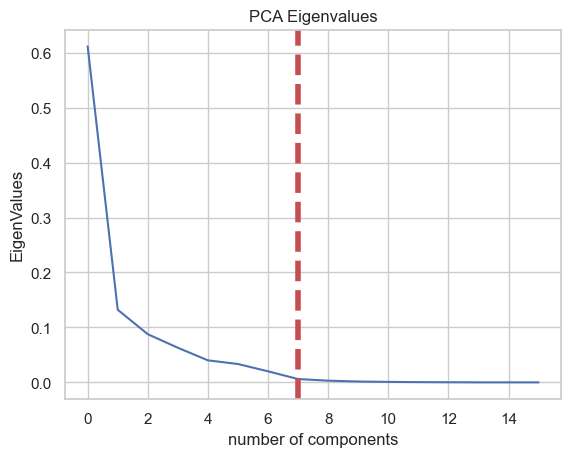

None

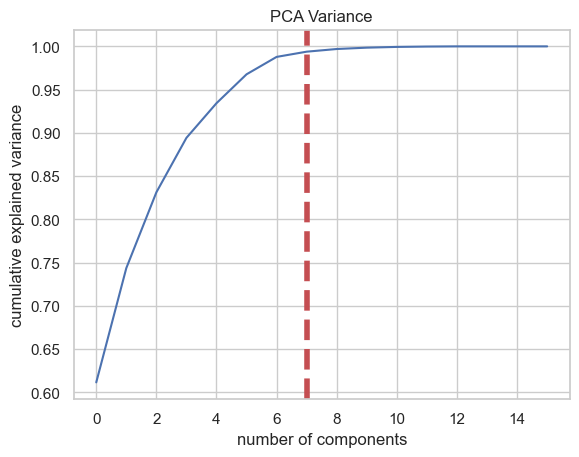

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.611462,0.611462
1,0.743590,0.132128
2,0.831226,0.087636
3,0.894227,0.063001
4,0.934296,0.040069
5,0.967703,0.033408
6,0.987828,0.020124


In [245]:
# Eigenvalues Plot (Elbow graph)
sns.set(style='whitegrid')
plt.plot(pca_test.explained_variance_ratio_)
plt.title("PCA Eigenvalues")
plt.xlabel('number of components')
plt.ylabel('EigenValues')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=7, ymin=0, ymax=1)
display(plt.show()) 

# Variance Plot
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.title("PCA Variance")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=7, ymin=0, ymax=1)
display(plt.show())


# Make table for the graph
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(7))

Looking at the graph above, we see that our variance curve makes a sharp turn at about 7 components. This is a good indicator that we might only need 7 components for our model.

Shifting focus to the dataframe just below the graph, we can observe that when we use PCA to reduce our 16 predicting variables down to 7 components, we can still explain over 98% of the variance. The other 9 components explain less than 2% of the variance, so we can cut them. Using this logic, we will use PCA to reduce the number of components from 16 to 7 for `X_train` and `X_test`. We will assign these recreated, reduced dimension datasets to `X_train_scaled_pca` and `X_test_scaled_pca`. This is done below.

In [246]:
pca = PCA(n_components=7)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

Each component is a linear combination of the original variables with corresponding “weights”. We can see these “weights” for each PCA component by creating a dataframe.

In [247]:
pca_dims = []
columns = ['team', 'matches_played', 'wins', 'draws', 'losses', 'goals_scored', 'goals_conceded', 'goal_diff', 'group_point', 'Win_Ratio', 'Loss_Ratio', 'GoalsScored_to_Matches', 'GoalsConceeded_to_Matches', 'Win_to_Loss', 'Wins_to_GoalsScored', 'GoalsScored_GoalsConceded'] 
for x in range(0, len(pca_df)):
    pca_dims.append('PCA Component {}'.format(x))
pca_test_df = pd.DataFrame(pca_test.components_, columns=columns, index=pca_dims)
pca_test_df.head(6).T

,PCA Component 0,PCA Component 1,PCA Component 2,PCA Component 3,PCA Component 4,PCA Component 5
team,-0.020297,-0.015095,-0.051919,0.981323,0.169652,-0.068850
matches_played,0.251911,-0.245955,0.119514,-0.100023,0.549379,-0.196351
wins,0.297313,-0.183805,-0.126706,-0.042484,0.197663,-0.026553
draws,0.111291,0.245311,0.699725,0.003419,0.279807,0.068308
losses,-0.240962,-0.305905,-0.249545,-0.090210,0.270738,-0.342014
goals_scored,0.270508,-0.335556,0.123805,0.007182,-0.078915,-0.151151
goals_conceded,-0.121655,-0.577372,0.218096,-0.005666,0.166328,0.337428
goal_diff,0.308197,-0.019819,0.004787,0.009396,-0.155032,-0.306324
group_point,0.295833,-0.025183,-0.084427,0.024738,-0.027819,0.305613
Win_Ratio,0.292278,-0.092843,-0.279941,0.016696,-0.045394,0.214527


### Random Forest

Now, we can fit our `X_train_scaled_pca` and `y_train data` to our Random Forest model, to see if we get any improvement on the model’s predictions. We also calculate and view the model's accuracy using the `score` method of the `RandomForestClassifier`.

In [248]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state= RANDOM_SEED)
rfc.fit(X_train_scaled_pca, y_train)
print("Accuracy:", rfc.score(X_train_scaled_pca, y_train))

Accuracy: 1.0


### Make First Predictions with Test Set

Now we are ready to make predictions on our scaled test set, `X_test_scaled_pca` using our model.

In [249]:
y_pred_pca = rfc.predict(X_test_scaled_pca)
y_pred_pca

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [250]:
# for i in range(len(y_test)):
#     if y_pred_pca[i] == y_test.iloc[i]:
#         print("Correct Prediction:", y_pred_pca[i])
#     else:
#         print("Incorrect Prediction. Predicted:", y_pred_pca[i], "Actual:", y_test.iloc[i])

We calculate the performance metrics of our model, comparing its predictions for the dependent variable `y_pred_pca` for the actual occured values `y_test`. We calculate the presicion and recall using the appropriate method from the scikit-learn library.

In [257]:
from sklearn.metrics import precision_score, recall_score, balanced_accuracy_score

# Calculate precision
precision = precision_score(y_test, y_pred_pca)

# Calculate recall
recall = recall_score(y_test, y_pred_pca)

# Print precision and recall
print("Precision:", precision)
print("Recall:", recall)

Precision: 0.625
Recall: 0.625


### Class Imbalance

Both from common knowledge and by looking at our dataset we can observe that there is a relatively large imbalance in the two values of the target variable, `champions`. Each year there will always only be one champion denoted at `1` whereas all other teams will be non champions or `0`s. We can observe this more easily through a bar chart displaying the counts of the two classes.

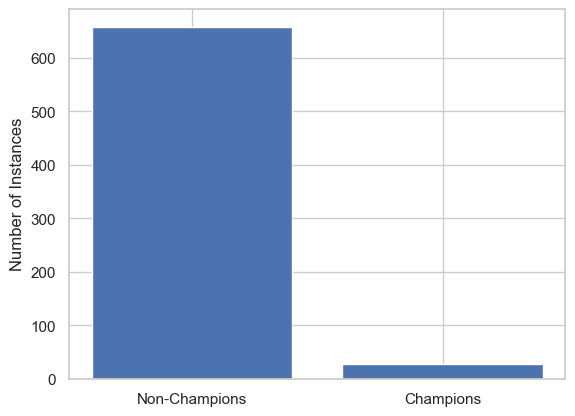

In [252]:
unique, counts = np.unique(y, return_counts=True)
plt.bar(unique, counts)
plt.xticks([0, 1], ['Non-Champions', 'Champions'])
plt.ylabel('Number of Instances')
plt.show()

We can see that a bias exists as there are much more non-champions in our dataset. This will have a significant impact on the performance of our models, since such data tend to be biased towards the majority class.

There are several ways to evaluate this imbalance and its effects on our model. One way is by observing the not too great recall and precision values for our model. **Since this problem is mainly about correctly identifying the champions, we want to minimize false negatives as much as we can. This means that a high recall should be preferred for this model.**

Another way to evaluate this imbalance is by looking at its ***balanced accuracy***. Balanced accuracy is a metric that takes into account the class imbalance by averaging the recall score of each class.

In [253]:
# Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred_pca)

print('Balanced accuracy:', balanced_acc)

Balanced accuracy: 0.8049242424242424


We see that the balanced accuracy is way less than regular accuracy.

#### Fixing Imbalance

All these are pointing to problems with our model arising largely from the imbalance issue. There are a few ways to fix class imbalance when building machine learning models, some of which include Undersampling, Oversampling, Ensemble Method, and Class Weights among a few. However, for our case we will go with **undersampling**. Undersampling is simply when you reduce the number of samples from the majority class to balance the class distribution in the training data. We reduce the number of samples from the majority class to balance the class distribution in the training data. It is a simple technique and since we reduce the size of the data that we push into the models. However, it should be noted that throwing away data is not usually always ideal as it means that we lose information. This can reduce the overall performance of the model and the quality of generalization.

It is relatively fine to use undersampling in our case, mostly because our dataset (particularly the majority class) contains many redundant samples that do not provide much additional information to the model. For this, we use the `RandomUnderSampler` function from the `imbalanced-learn` package.

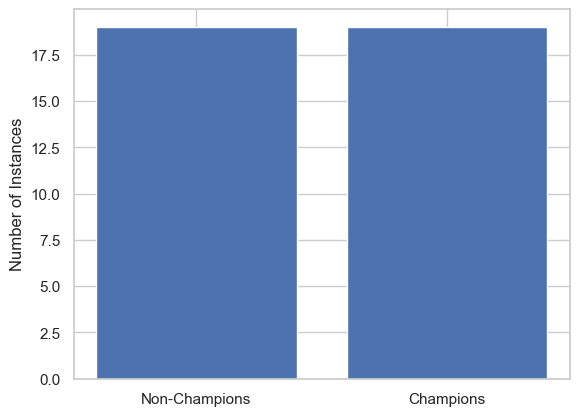

In [254]:
from imblearn.under_sampling import RandomUnderSampler

# undersample
rus = RandomUnderSampler(random_state=RANDOM_SEED)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_scaled_pca, y_train)

# plot the new distribution
unique, counts = np.unique(y_train_resampled, return_counts=True)
plt.bar(unique, counts)
plt.xticks([0, 1], ['Non-Champions', 'Champions'])
plt.ylabel('Number of Instances')
plt.show()

After undersampling, we now have relatively equal samples for each class. This should improve the performance of our model.

We go ahead to train a new Random Forest model with our new resampled data.

In [255]:
rfc_resampled = RandomForestClassifier(random_state=RANDOM_SEED)
rfc_resampled.fit(X_train_resampled, y_train_resampled)
print("Accuracy:", rfc_resampled.score(X_train_resampled, y_train_resampled))

Accuracy: 1.0


Normal accuracy remains unchanged, so we calculate the balanced accuracy, precision and recall to see if there is any improvement.

In [260]:
y_pred_pca_resampled = rfc_resampled.predict(X_test_scaled_pca)
balanced_acc_resampled = balanced_accuracy_score(y_test, y_pred_pca_resampled)

print('Balanced accuracy:', balanced_acc_resampled)

# Calculate precision
precision_resampled = precision_score(y_test, y_pred_pca_resampled)

# Calculate recall
recall_resampled = recall_score(y_test, y_pred_pca_resampled)

# Print precision and recall
print("Precision:", precision_resampled)
print("Recall:", recall_resampled)

Balanced accuracy: 0.8743686868686869
Precision: 0.21875
Recall: 0.875


As seen we get a significant improvement in our recall and balanced accuracy. However, our precision value tends to plummet. This is as a result of undersampling. Undersampling often leads to an improvement in recall, but at the expense of sacrificing precision.

In [91]:
# Performing Principal Component Analysis (PCA)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ind_features = df.columns.drop("champions").tolist()
ind_features = df.drop("champions", axis=1).columns.tolist()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[ind_features]) 

In [15]:
pca = PCA(n_components=16)  # Choose the number of desired components
pca_features = pca.fit_transform(scaled_features)
pca_features

array([[ 3.74515574e+00,  1.99997374e+00,  1.20020056e+00, ...,
        -1.10011983e-15,  6.93491503e-16,  5.35408086e-16],
       [ 4.52124097e+00,  1.71165087e+00, -2.99699879e+00, ...,
         1.02636434e-15, -9.03208916e-17, -3.16880209e-16],
       [ 1.67250564e+00,  3.23352502e+00,  1.40735020e+00, ...,
         1.18644320e-14, -9.44678744e-16,  6.12025980e-17],
       ...,
       [-2.14646254e-01, -1.41442024e+00,  6.31325043e-01, ...,
         3.95027216e-17,  3.50392152e-18,  8.20036927e-18],
       [ 1.67077237e+00,  6.83315904e-01, -5.89869722e-01, ...,
        -2.95292753e-17, -9.60956275e-17,  3.30933469e-17],
       [-4.99949267e+00, -1.02932892e+00,  4.42375919e-01, ...,
         1.21533174e-17, -1.27166158e-16,  6.58328642e-17]])

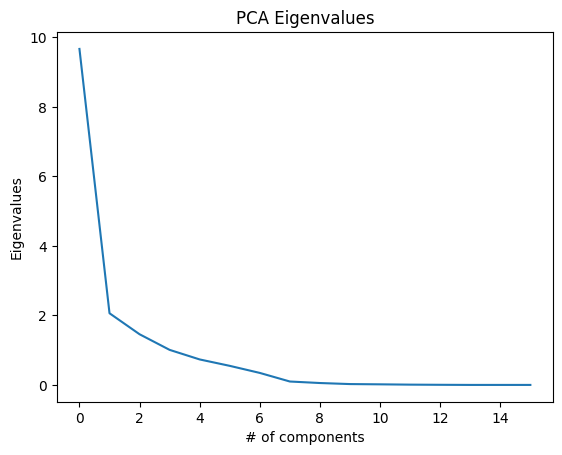

In [16]:
plt.ylabel("Eigenvalues")
plt.xlabel("# of components")
plt.title("PCA Eigenvalues")
plt.plot(pca.explained_variance_)
plt.show()

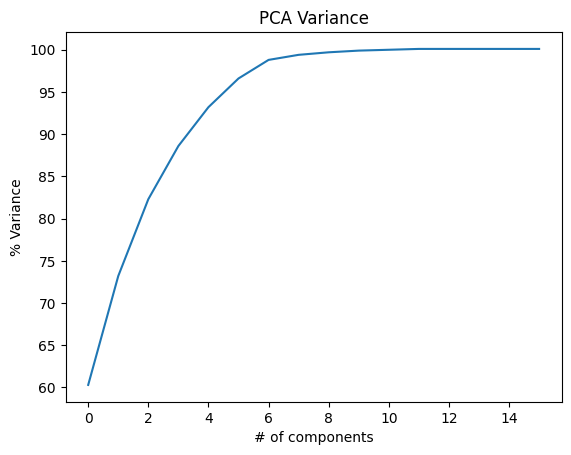

In [17]:
variance = pca.explained_variance_ratio_
var = np.cumsum(np.round(variance, decimals = 3 )* 100)

plt.ylabel("% Variance")
plt.xlabel("# of components")
plt.title("PCA Variance")
plt.plot(var)
plt.show()

## Random Forest

### Training the Model
After performing a Principal Component Analysis (PCA) on the features, we use these features to train our model. We use a Random Forest algorithm for training our model.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(pca_features, df['champions'], test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [19]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [130]:
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        print("Correct Prediction:", y_pred[i])
    else:
        print("Incorrect Prediction. Predicted:", y_pred[i], "Actual:", y_test.iloc[i])

Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Incorrect Prediction. Predicted: 0 Actual: 1
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Incorrect Prediction. Predicted: 1 Actual: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct Prediction: 0
Correct 

### Calculating Performance Metrics

After training the model, it only makes sense to evaluate the performance of this trained model. Accuracy is correctly computed and we calculate both precision and recall using scikit learn's built-in methods `precision_score` and `recall_score`.

**Accuracy:** In this context, accuracy refers to the proportion of correctly predicted winners out of all the predictions made by the model.

**Precision:** Precision measures the proportion of correctly predicted winners among all instances that the model predicted as winners. In the context of predicting the Champions League winner, precision would indicate how many of the teams predicted as winners by the model actually went on to win the tournament. 

**Recall:** Recall measures the proportion of correctly predicted winners out of all the actual winners in the dataset. In the context of predicting the Champions League winner, recall would indicate how many of the actual winning teams were correctly identified by the model.

In [20]:
from sklearn.metrics import precision_score, recall_score
correct_predictions = sum(y_pred == y_test)

# Calculate accuracy
accuracy = correct_predictions / len(y_test)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Print correct predictions and accuracy
print("Correct Predictions:", correct_predictions)
print("Accuracy:", accuracy)

# Print precision and recall
print("Precision:", precision)
print("Recall:", recall)

Correct Predictions: 132
Accuracy: 0.9635036496350365
Precision: 0.75
Recall: 0.42857142857142855


Print correct and incorrect predictions made by the model to get a holistic overview of the its performance.

In [131]:
# Print correct and incorrect predictions
# for i in range(len(y_test)):
#     if y_pred[i] == y_test.iloc[i]:
#         print("Correct Prediction:", y_pred[i])
#     else:
#         print("Incorrect Prediction. Predicted:", y_pred[i], "Actual:", y_test.iloc[i])


### Making Our Predictions
Now that we have our model trained and tested, we go ahead and import the data for the teams left in the Champions Leage into its own dataset, `real.csv`.

In [92]:
real = pd.read_csv('real.csv')
real

,Club,Participated,Titles,Played,Win,Draw,Loss,Goals For,Goals Against,Pts,Goal Diff
0,Real Madrid CF,53,14,476,285,81,110,1047,521.0,651.0,526.0
1,FC Bayern München,39,6,382,229,76,77,804,373.0,534.0,431.0
2,FC Barcelona,33,5,339,197,76,66,667,343.0,470.0,324.0
3,Arsenal FC,21,0,201,101,43,57,332,218.0,245.0,114.0
4,Borussia Dortmund,21,1,170,81,33,56,287,214.0,195.0,73.0
5,Club Atlético de Madrid,18,0,160,76,42,42,226,152.0,194.0,74.0
6,Paris Saint-Germain,16,0,143,77,27,39,283,166.0,181.0,117.0
7,Manchester City FC,13,1,119,66,24,29,245,131.0,156.0,114.0


Once we have our dataset of the teams left in the championship, we go ahead and encode the categorical variables necessary for our model, specifically the names of the different teams, "Club" in this case.

In [93]:
real['Club'] = real['Club'].astype('category').cat.codes
real

,Club,Participated,Titles,Played,Win,Draw,Loss,Goals For,Goals Against,Pts,Goal Diff
0,7,53,14,476,285,81,110,1047,521.0,651.0,526.0
1,4,39,6,382,229,76,77,804,373.0,534.0,431.0
2,3,33,5,339,197,76,66,667,343.0,470.0,324.0
3,0,21,0,201,101,43,57,332,218.0,245.0,114.0
4,1,21,1,170,81,33,56,287,214.0,195.0,73.0
5,2,18,0,160,76,42,42,226,152.0,194.0,74.0
6,6,16,0,143,77,27,39,283,166.0,181.0,117.0
7,5,13,1,119,66,24,29,245,131.0,156.0,114.0


We also rename some of the columns/features for consistency.

In [94]:
# Rename necessary features
real = real.rename(columns={'Participated': 'matches_played', 'Win': 'wins', 'Loss': 'losses', 'Goals For': 'goals_scored', 'Goals Against' : 'goals_conceded', 'Goal Diff': 'goal_diff'})
real.drop(['Titles', 'Pts'], axis = 1, inplace = True)
real.head()

,Club,matches_played,Played,wins,Draw,losses,goals_scored,goals_conceded,goal_diff
0,7,53,476,285,81,110,1047,521.0,526.0
1,4,39,382,229,76,77,804,373.0,431.0
2,3,33,339,197,76,66,667,343.0,324.0
3,0,21,201,101,43,57,332,218.0,114.0
4,1,21,170,81,33,56,287,214.0,73.0


It is also neccessary to compute the features we previously computed on our data during the training and testing phases.

In [116]:
real['Win_Ratio'] = (real['wins']) / real['matches_played']
real['Loss_Ratio'] = (real['losses']) / real['matches_played']
real['GoalsScored_to_Matches'] = (real['goals_scored']) / real['matches_played']
real['GoalsConceeded_to_Matches'] = (real['goals_conceded']) / real['matches_played']
real['Win_to_Loss'] = (real['wins']) / (real['losses'] + 1)
real['Wins_to_GoalsScored'] = (real['wins']) / (df['goals_scored'] + 1) 
real['GoalsScored_GoalsConceded'] = (real['goals_scored'] - real['goals_conceded'])
real

,Club,matches_played,Played,wins,Draw,losses,goals_scored,goals_conceded,goal_diff,Win_Ratio,Loss_Ratio,GoalsScored_to_Matches,GoalsConceeded_to_Matches,Win_to_Loss,Wins_to_GoalsScored,GoalsScored_GoalsConceded
0,7,53,476,285,81,110,1047,521.0,526.0,5.377358,2.075472,19.754717,9.830189,2.567568,19.000000,526.0
1,4,39,382,229,76,77,804,373.0,431.0,5.871795,1.974359,20.615385,9.564103,2.935897,19.083333,431.0
2,3,33,339,197,76,66,667,343.0,324.0,5.969697,2.000000,20.212121,10.393939,2.940299,24.625000,324.0
3,0,21,201,101,43,57,332,218.0,114.0,4.809524,2.714286,15.809524,10.380952,1.741379,16.833333,114.0
4,1,21,170,81,33,56,287,214.0,73.0,3.857143,2.666667,13.666667,10.190476,1.421053,27.000000,73.0
5,2,18,160,76,42,42,226,152.0,74.0,4.222222,2.333333,12.555556,8.444444,1.767442,9.500000,74.0
6,6,16,143,77,27,39,283,166.0,117.0,4.812500,2.437500,17.687500,10.375000,1.925000,12.833333,117.0
7,5,13,119,66,24,29,245,131.0,114.0,5.076923,2.230769,18.846154,10.076923,2.200000,13.200000,114.0


In [262]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(real)
test = pca.transform(scaled_features)

# Make predictions
y_real_pred = rfc.predict(test)
y_real_pred

array([0, 0, 0, 0, 0, 0, 0, 0])

In [263]:
y_real_pred = rfc_resampled.predict(test)
y_real_pred

array([1, 0, 0, 0, 0, 0, 0, 0])